# Introduction <a class="anchor" id="0"></a>
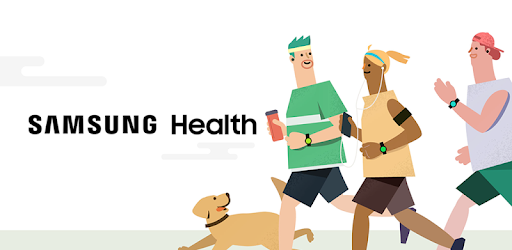

_"If you are in a bad mood, go for a walk. If you are still in a bad mood, go for another walk."_  Hippocrates.
    
I have always loved walking. In 2016, I bought a new smartphone, a Samsung Galaxy S6. Thanks to the preinstalled app "Samsung Health", I was able to track my daily number of steps and burned calories. This was very helpful because I was a very active student then. Six years later, in 2022, I am still using the app but my daily life has significantly changed as I am now working as a data analyst, sitting at my desk almost all day long. This made me wonder :

* In 6 years, how many steps did I make in total ? 
* What year was I the most active ?
* How did my exercice habits change over time in terms of frequency and intensity of workouts ?

Let's find out!

# Table of contents
* [0. Introduction](#0)
* [1. Importing my pedometer data into a Pandas dataframe](#1)
 * [1.1. Preliminary remarks about the data source](#1.1)
 * [1.2. The import process](#1.2)
 * [1.3. A quick glance at the original dataset](#1.3)
* [2. Performing some quality checks](#2)
 * [2.1. Completion rate check](#2.1)
 * [2.2. Duplicates check](#2.2)
 * [2.3. Outliers check](#2.3)
* [3. Quick data preparation](#3)
* [4. Insights derived from data visualization](#4)
 * [4.1. I walked ca. 12,000 km walked over 6 years. This is the distance between Paris (France) and Vladivostok (Russia)!](#4.1)
 * [4.2. My walking habits changed significantly over time](#4.2)
 * [4.3. The mean does not mean anything](#4.3)
 * [4.4. Reaching 10,000 steps every day is quite a challenge](#4.4)
 * [4.5. What about calories? Kilometers to walk to burn the calories of a croissant](#4.4)
* [5. Conclusion](#5)
 * [5.1. Summary of the insights and how to go further](#5.1) 
 * [5.2. Technical challenges encountered](#5.2) 
 * [5.3. What I learnt as a data analyst](#5.3) 

# 1. Importing my pedometer data into a Pandas dataframe <a class="anchor" id="1"></a>


## 1.1. Preliminary remarks about the data source <a class="anchor" id="1.1"></a>
*Data source* : To retrieve my pedometer data from the Samsung Health app, I had to download a csv file entitled "com.samsung.shealth.tracker.pedometer_day_summary.202210091102".  

*Data structure* : The original dataset has 19 variables (more about them below). The first row of the csv file holds the title of the file. The 2nd row contains the names of the different variables. The rows below contain the observation values. 

*Information in the dataset* : The dataset provides information about the daily number of steps and calories burned. The information are summarized for each day in the dataset.

*To find out more* : Samsung provides a technical documentation for developers as well as the meaning of some variables here: https://developer.samsung.com/health/android/data/api-reference/com/samsung/android/sdk/healthdata/HealthConstants.StepCount.html

## 1.2. The import process <a class="anchor" id="1.2"></a>

In [1]:
# Importing the relevant Python packages for the case study
import pandas as pd
from datetime import datetime

    # Dat viz focus
import matplotlib.pyplot as plt
import seaborn as sns

    # Notebook format
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
# Importing the data in a Pandas dataframe
    ## Since the csv file contains the names of the variables only in the 2nd row, 1st row is skipped
    ## Moreover, the values in the 1st column should not be considered as an index
pedometer = pd.read_csv('C:/Users/margo/Documents/Documents/Quotidien/Samsung_Health/Test_20221009/pedometer_day_summary_202210091102.csv',
                skiprows = 1,
                index_col = False)

## 1.3. A quick glance at the original dataset <a class="anchor" id="1.3"></a>

In [3]:
# The data set contains 19 columns and 4,304 rows
print(pedometer.shape) 

# Having a glance at the first values of the original dataset
pedometer.head(6)

(4304, 19)


,step_count,binning_data,active_time,recommendation,run_step_count,update_time,source_package_name,create_time,source_info,speed,distance,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time
0,8697,6cc5d795-b6e6-434e-9b02-2c08e7e906cf.binning_d...,4652693,6000,18,2017-03-19 15:56:14.218,com.sec.android.app.shealth,2017-03-18 16:23:44.103,NaN,1.356969,6313.56,262.93997,8679,VfS0qUERdZ,com.sec.android.app.shealth,0,6cc5d795-b6e6-434e-9b02-2c08e7e906cf.achieveme...,6cc5d795-b6e6-434e-9b02-2c08e7e906cf,1489881600000
1,11428,4730f039-2fa8-466a-a947-5dd0af347e7c.binning_d...,5794265,10000,39,2017-03-24 00:29:27.150,com.sec.android.app.shealth,2017-03-08 16:00:02.148,NaN,2.934353,8313.46,354.81000,11389,fzT18hJDCE,com.sec.android.app.shealth,5116,4730f039-2fa8-466a-a947-5dd0af347e7c.achieveme...,4730f039-2fa8-466a-a947-5dd0af347e7c,1488931200000
2,2648,066f4a3f-37e7-4dce-be8c-854b3c42a272.binning_d...,1269754,6000,36,2016-12-23 23:00:03.266,com.sec.android.app.shealth,2016-12-23 23:00:03.266,NaN,2.997327,1945.34,83.62000,2612,fzT18hJDCE,com.sec.android.app.shealth,0,066f4a3f-37e7-4dce-be8c-854b3c42a272.achieveme...,066f4a3f-37e7-4dce-be8c-854b3c42a272,1482451200000
3,6807,02fda250-e056-4773-bd10-f72e1828a737.binning_d...,3322088,6000,21,2016-12-20 08:10:19.980,com.sec.android.app.shealth,2016-12-20 08:10:19.980,NaN,2.536459,4994.66,214.59000,6786,fzT18hJDCE,com.sec.android.app.shealth,4000,02fda250-e056-4773-bd10-f72e1828a737.achieveme...,02fda250-e056-4773-bd10-f72e1828a737,1482105600000
4,15350,7d1d2585-5457-4e37-8343-db49798d0065.binning_d...,7753517,6000,64,2017-01-30 15:21:01.438,com.sec.android.app.shealth,2017-01-30 02:48:55.794,NaN,1.441294,11175.10,472.72995,15286,VfS0qUERdZ,com.sec.android.app.shealth,0,7d1d2585-5457-4e37-8343-db49798d0065.achieveme...,7d1d2585-5457-4e37-8343-db49798d0065,1485734400000
5,9854,eae52462-c0d8-4505-82ed-0265410d25be.binning_d...,3520813,6000,9069,2016-12-17 17:19:33.240,com.sec.android.app.shealth,2016-12-17 13:34:18.430,NaN,2.962901,10431.82,712.87000,785,VfS0qUERdZ,com.sec.android.app.shealth,0,eae52462-c0d8-4505-82ed-0265410d25be.achieveme...,eae52462-c0d8-4505-82ed-0265410d25be,1481932800000


# 2. Performing some quality checks <a class="anchor" id="2"></a>

Before analyzing the pedometer data in depth, one needs to first confirm that the data quality of the underlying dataset is good enough. To do so, 3 different quality checks will be performed:

* _Completion rate check_ : Does the dataset have lots of Null values in specific columns?
* _Duplicates check_ : Does the dataset have indeed 1 row per day of observation ?
* _Outliers check_ : Do the columns contain values that make sense ?

## 2.1. Completion rate check <a class="anchor" id="2.1"></a>

_Check n°1 : What is the percentage of null values in each column of the dataframe ?_

In [4]:
# Methodology : 
# For each column in the dataframe, I counted the number of Null values and divided it by the total number of rows.
# To obtain a percentage format, I multipled the end result by 100.
pedometer.isna().sum() / pedometer.shape[0] * 100

step_count              0.000000
binning_data            0.000000
active_time             0.000000
recommendation          0.000000
run_step_count          0.000000
update_time             0.000000
source_package_name     0.000000
create_time             0.000000
source_info            61.222119
speed                   0.000000
distance                0.000000
calorie                 0.000000
walk_step_count         0.000000
deviceuuid              0.000000
pkg_name                0.000000
healthy_step            0.000000
achievement             0.000000
datauuid                0.000000
day_time                0.000000
dtype: float64

<div class="alert alert-block alert-success">
<b>Success:</b> All columns seem very well completed except one single column, "source_info" (more than half of the observations are Null). The latter will be dropped since it does not add value to the case study. Indeed, my health info come from a single data source: the app on my smartphone (I do not own a smart watch).
</div>

## 2.2 Duplicates check <a class="anchor" id="2.2"></a>

_Check n°2 : What is the granularity of the dataset ? Is it really one value per day or are there duplicates in the dataset?_

In [5]:
#Step 1 : Creating dates from the timestamp variables
format1 ="%Y-%m-%d %H:%M:%S.%f"
format2 = "%Y-%m-%d"
pedometer["create_date"] = pedometer["create_time"].apply(lambda x: datetime.strptime(x, format1).strftime(format2))
pedometer["update_date"] = pedometer["update_time"].apply(lambda x: datetime.strptime(x, format1).strftime(format2))

In [6]:
# Step 2: Computing the number of rows per creation date, and returning the dates for which there are more than 1 row
date_counts = pedometer["create_date"].value_counts(ascending = False).rename_axis("create_date").to_frame("counts")
date_counts[date_counts["counts"] > 1].sort_values(["counts", "create_date"], ascending = False)

,counts
create_date,
2022-01-22,30
2019-10-30,5
2022-09-26,4
2022-09-17,4
2022-09-03,4
...,...
2016-12-07,2
2016-12-04,2
2016-12-03,2


<div class="alert alert-block alert-danger">
<b>Danger:</b> The original dataset has some duplicated values ! Indeed, many creation dates have more than 2 rows associated (in the extreme case, the creation date "2022-01-22" has up to 30 rows associated!). This seems to happen for no specific period (different years are represented). Let's investigate further on a small sample of observations to understand where the duplicates come from.
</div>

In [7]:
# Step 3: Confirming the existence of duplicated values thanks to a small sample
pedometer[pedometer["create_date"]>'2022-10-05'].sort_values("create_time", ascending = True)

,step_count,binning_data,active_time,recommendation,run_step_count,update_time,source_package_name,create_time,source_info,speed,...,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time,create_date,update_date
4297,7939,e183f42f-9c35-4b24-abe0-a4b586a7b98c.binning_d...,4184406,7000,10,2022-10-06 19:50:08.905,com.sec.android.app.shealth,2022-10-06 06:44:04.474,e183f42f-9c35-4b24-abe0-a4b586a7b98c.source_in...,1.385384,...,246.019910,7929,VfS0qUERdZ,com.sec.android.app.shealth,0,e183f42f-9c35-4b24-abe0-a4b586a7b98c.achieveme...,e183f42f-9c35-4b24-abe0-a4b586a7b98c,1665014400000,2022-10-06,2022-10-06
4298,7939,cdc6fc50-ac4c-40eb-b828-12e9daedc009.binning_d...,4184406,7000,10,2022-10-06 22:00:04.971,com.sec.android.app.shealth,2022-10-06 22:00:04.971,NaN,1.385384,...,246.019910,7929,xDq4cMfd7l,com.sec.android.app.shealth,0,cdc6fc50-ac4c-40eb-b828-12e9daedc009.achieveme...,cdc6fc50-ac4c-40eb-b828-12e9daedc009,1665014400000,2022-10-06,2022-10-06
4299,15038,32fcc169-0653-4848-a4ed-f7778bc8430d.binning_d...,7911939,7000,0,2022-10-07 20:35:46.424,com.sec.android.app.shealth,2022-10-07 05:52:46.705,32fcc169-0653-4848-a4ed-f7778bc8430d.source_in...,1.386041,...,460.599980,15038,VfS0qUERdZ,com.sec.android.app.shealth,0,32fcc169-0653-4848-a4ed-f7778bc8430d.achieveme...,32fcc169-0653-4848-a4ed-f7778bc8430d,1665100800000,2022-10-07,2022-10-07
4300,15038,881694d7-78ce-4ce2-b9fa-e0a203587968.binning_d...,7911939,7000,0,2022-10-07 22:00:03.539,com.sec.android.app.shealth,2022-10-07 22:00:03.539,NaN,1.386041,...,460.599980,15038,xDq4cMfd7l,com.sec.android.app.shealth,0,881694d7-78ce-4ce2-b9fa-e0a203587968.achieveme...,881694d7-78ce-4ce2-b9fa-e0a203587968,1665100800000,2022-10-07,2022-10-07
4301,9310,d3f46757-a7d6-49a9-b76d-8a0e29649b5d.binning_d...,5015033,7000,6,2022-10-08 20:02:20.286,com.sec.android.app.shealth,2022-10-08 07:54:05.233,d3f46757-a7d6-49a9-b76d-8a0e29649b5d.source_in...,1.346731,...,289.839970,9304,VfS0qUERdZ,com.sec.android.app.shealth,0,d3f46757-a7d6-49a9-b76d-8a0e29649b5d.achieveme...,d3f46757-a7d6-49a9-b76d-8a0e29649b5d,1665187200000,2022-10-08,2022-10-08
4302,9310,873de0ca-38e8-4c82-bf9a-7e94af2cd0bd.binning_d...,5015033,7000,6,2022-10-08 22:44:13.996,com.sec.android.app.shealth,2022-10-08 22:44:13.996,NaN,1.346731,...,289.839970,9304,xDq4cMfd7l,com.sec.android.app.shealth,0,873de0ca-38e8-4c82-bf9a-7e94af2cd0bd.achieveme...,873de0ca-38e8-4c82-bf9a-7e94af2cd0bd,1665187200000,2022-10-08,2022-10-08
4303,239,a6d0c163-bcad-4780-9e6d-edc5e199b037.binning_d...,149428,7000,0,2022-10-09 08:17:12.971,com.sec.android.app.shealth,2022-10-09 04:25:35.427,a6d0c163-bcad-4780-9e6d-edc5e199b037.source_in...,1.123279,...,8.299999,239,VfS0qUERdZ,com.sec.android.app.shealth,0,a6d0c163-bcad-4780-9e6d-edc5e199b037.achieveme...,a6d0c163-bcad-4780-9e6d-edc5e199b037,1665273600000,2022-10-09,2022-10-09


<div class="alert alert-block alert-warning">
<b>Learnings:</b> Rows seem to be completely identical as far as the step counts and calories are considered. However, 2 differences are to be noticed: <br> i) The duplicates seem to occur due to the 'binning data', 'source info' and 'deviceuuid' columns ; <br> ii) For some unknown reason, the create time and update time are exactly identical as far as the deviceuuid "xDq4cMfd7l" is considered. 
</div>

In [8]:
# Step 4: Investigate the differences between deviceuuid
print('\033[1m', "Minimum create_date ", '\033[0m', pedometer.groupby("deviceuuid")["create_date"].min(), "\n")
print('\033[1m', "Maximum create_date ", '\033[0m', pedometer.groupby("deviceuuid")["create_date"].max(), "\n")
print('\033[1m', "Number of create days covered ", '\033[0m', pedometer.groupby("deviceuuid")["create_date"].count(), "\n")
print('\033[1m', "% of create_dates covered ", '\033[0m',pedometer.groupby("deviceuuid")["create_date"].count() 
          / pedometer["create_date"].nunique() * 100, "\n")

 Minimum create_date   deviceuuid
VfS0qUERdZ    2016-11-25
fzT18hJDCE    2016-11-26
t/q+ToT9P9    2019-09-19
xDq4cMfd7l    2022-01-22
Name: create_date, dtype: object 

 Maximum create_date   deviceuuid
VfS0qUERdZ    2022-10-09
fzT18hJDCE    2019-09-17
t/q+ToT9P9    2022-01-22
xDq4cMfd7l    2022-10-08
Name: create_date, dtype: object 

 Number of create days covered   deviceuuid
VfS0qUERdZ    2139
fzT18hJDCE    1021
t/q+ToT9P9     857
xDq4cMfd7l     287
Name: create_date, dtype: int64 

 % of create_dates covered   deviceuuid
VfS0qUERdZ    101.134752
fzT18hJDCE     48.274232
t/q+ToT9P9     40.520095
xDq4cMfd7l     13.569740
Name: create_date, dtype: float64 



<div class="alert alert-block alert-warning">
<b>Learnings:</b> There are 4 deviceuuids in the dataset, but only "VfS0qUERdZ" seems to cover the whole period with values beginning at the end of 2016 and ending in late 2022. Other deviceuuids like 't/q+ToT9P9' cover a much shorter period of time (eg. from 2019 to 2022).
</div>

In [9]:
# Step 5 : Keeping only the data associated to the deviceuuid "VfS0qUERdZ"
pedometer = pedometer[pedometer["deviceuuid"]=="VfS0qUERdZ"]
pedometer.sort_values("create_date", ascending = True).head(8)

,step_count,binning_data,active_time,recommendation,run_step_count,update_time,source_package_name,create_time,source_info,speed,...,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time,create_date,update_date
144,385,a93bfe30-f6c4-4d21-9ea6-24f041f4fd26.binning_d...,167688,6000,6,2016-11-25 19:04:33.444,com.sec.android.app.shealth,2016-11-25 13:13:03.287,NaN,1.631118,...,14.47000,379,VfS0qUERdZ,com.sec.android.app.shealth,0,a93bfe30-f6c4-4d21-9ea6-24f041f4fd26.achieveme...,a93bfe30-f6c4-4d21-9ea6-24f041f4fd26,1480032000000,2016-11-25,2016-11-25
7,7088,9f320dff-0957-4b70-86ae-2a882263139d.binning_d...,2595080,6000,6083,2016-11-27 18:03:05.574,com.sec.android.app.shealth,2016-11-27 17:15:01.242,NaN,2.849973,...,492.03000,1005,VfS0qUERdZ,com.sec.android.app.shealth,0,9f320dff-0957-4b70-86ae-2a882263139d.achieveme...,9f320dff-0957-4b70-86ae-2a882263139d,1480204800000,2016-11-27,2016-11-27
14,2014,20a4ce2d-5bcc-442d-a80e-fc3f442087ba.binning_d...,936206,6000,7,2016-11-28 19:04:31.036,com.sec.android.app.shealth,2016-11-28 07:38:07.812,NaN,1.550908,...,67.25000,2007,VfS0qUERdZ,com.sec.android.app.shealth,0,20a4ce2d-5bcc-442d-a80e-fc3f442087ba.achieveme...,20a4ce2d-5bcc-442d-a80e-fc3f442087ba,1480291200000,2016-11-28,2016-11-28
73,9626,42d66b02-3de3-418b-8b1a-a8e918b29889.binning_d...,3499741,6000,8986,2016-11-29 17:11:49.441,com.sec.android.app.shealth,2016-11-29 09:22:50.469,NaN,2.906311,...,687.09000,640,VfS0qUERdZ,com.sec.android.app.shealth,0,42d66b02-3de3-418b-8b1a-a8e918b29889.achieveme...,42d66b02-3de3-418b-8b1a-a8e918b29889,1480377600000,2016-11-29,2016-11-29
145,1051,9f63422a-45db-4a68-9afe-2b17db629d3d.binning_d...,499284,6000,4,2016-11-30 21:51:08.121,com.sec.android.app.shealth,2016-11-30 11:14:33.504,NaN,1.512105,...,34.97000,1047,VfS0qUERdZ,com.sec.android.app.shealth,0,9f63422a-45db-4a68-9afe-2b17db629d3d.achieveme...,9f63422a-45db-4a68-9afe-2b17db629d3d,1480464000000,2016-11-30,2016-11-30
30,1937,b13e9292-d0c1-44cf-89b6-ea3ae6e9aa87.binning_d...,945463,6000,4,2016-12-01 16:36:23.994,com.sec.android.app.shealth,2016-12-01 05:48:27.735,NaN,1.471807,...,63.34000,1933,VfS0qUERdZ,com.sec.android.app.shealth,0,b13e9292-d0c1-44cf-89b6-ea3ae6e9aa87.achieveme...,b13e9292-d0c1-44cf-89b6-ea3ae6e9aa87,1480550400000,2016-12-01,2016-12-01
139,24,2c9a0767-1055-41c7-95cf-c0a2b897437f.binning_d...,14945,6000,0,2016-12-02 10:55:01.785,com.sec.android.app.shealth,2016-12-02 10:54:01.186,NaN,1.114074,...,0.76000,24,VfS0qUERdZ,com.sec.android.app.shealth,0,2c9a0767-1055-41c7-95cf-c0a2b897437f.achieveme...,2c9a0767-1055-41c7-95cf-c0a2b897437f,1480636800000,2016-12-02,2016-12-02
146,2553,4fb78b1b-f88f-4afc-8a0e-def28eaf01b9.binning_d...,1192879,6000,3,2016-12-03 18:32:53.136,com.sec.android.app.shealth,2016-12-03 07:35:01.642,NaN,1.545311,...,83.10999,2550,VfS0qUERdZ,com.sec.android.app.shealth,0,4fb78b1b-f88f-4afc-8a0e-def28eaf01b9.achieveme...,4fb78b1b-f88f-4afc-8a0e-def28eaf01b9,1480723200000,2016-12-03,2016-12-03


In [10]:
# Step 6: One chooses to remove variables that: 
    # i) cause duplicates,
    # ii) are no use for the case study, 
    #iii) cannot be understood due to the lack of documentation
pedometer = pedometer.drop(["binning_data", "source_package_name", "source_info", 
                            "pkg_name", "achievement", "deviceuuid", "datauuid",
                           "healthy_step", "speed" , "active_time",
                            #"create_time", "update_time"
                           ], axis =1 )

In [11]:
# Step 7 : Rearranging the order of columns to improve readability
cols = [
    'create_date',
    'update_date',
    'recommendation',
    'step_count',
    'walk_step_count',
    'run_step_count',
    'distance',
    'calorie',
    'day_time',
    'create_time',
    'update_time'
]
pedometer = pedometer[cols]
pedometer.sort_values("create_date", ascending = False).head(8)

,create_date,update_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,day_time,create_time,update_time
4303,2022-10-09,2022-10-09,7000,239,239,0,167.84999,8.299999,1665273600000,2022-10-09 04:25:35.427,2022-10-09 08:17:12.971
4301,2022-10-08,2022-10-08,7000,9310,9304,6,6753.90040,289.839970,1665187200000,2022-10-08 07:54:05.233,2022-10-08 20:02:20.286
4299,2022-10-07,2022-10-07,7000,15038,15038,0,10966.27050,460.599980,1665100800000,2022-10-07 05:52:46.705,2022-10-07 20:35:46.424
4297,2022-10-06,2022-10-06,7000,7939,7929,10,5797.01070,246.019910,1665014400000,2022-10-06 06:44:04.474,2022-10-06 19:50:08.905
4295,2022-10-05,2022-10-05,7000,10168,10163,5,7404.49070,310.759920,1664928000000,2022-10-05 06:27:54.599,2022-10-05 20:15:27.266
4293,2022-10-04,2022-10-04,7000,8925,8919,6,6356.95000,283.360000,1664841600000,2022-10-04 07:01:08.330,2022-10-04 20:43:02.523
4291,2022-10-03,2022-10-03,7000,6067,6067,0,4423.66000,191.400000,1664755200000,2022-10-03 05:44:14.599,2022-10-03 19:22:20.471
4289,2022-10-02,2022-10-02,7000,1018,1018,0,717.29000,36.980000,1664668800000,2022-10-02 05:09:41.100,2022-10-02 21:03:16.778


<div class="alert alert-block alert-success">
<b>Success:</b> In the sample rows above, duplicates have been correctly eliminated (e.g. only 1 row per create_date).
</div>

In [12]:
# Step 8 : Ensuring there are no more duplicates
date_counts = pedometer["create_date"].value_counts(ascending = False).rename_axis("create_date").to_frame("counts")
date_counts[date_counts["counts"] > 1].sort_values("create_date", ascending = False)

,counts
create_date,
2022-09-30,2
2022-09-26,2
2022-09-17,2
2022-09-14,2
2022-09-03,2
...,...
2017-01-09,2
2017-01-07,2
2017-01-02,2


<div class="alert alert-block alert-danger">
<b>Danger:</b> There are still duplicates in the dataset !
</div>

In [13]:
# Investigating further and focusing on some examples that still have duplicate values based on step 6 results
pedometer[(pedometer["create_date"]>='2022-09-14')
          & (pedometer["create_date"]<='2022-09-18')
         ].sort_values("create_date")

,create_date,update_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,day_time,create_time,update_time
4218,2022-09-14,2022-09-14,7000,26575,26528,47,18841.6300,1017.57996,1663113600000,2022-09-14 06:15:40.190,2022-09-14 20:51:22.522
4225,2022-09-14,2022-09-15,7000,32481,32481,0,22865.4000,1236.21000,1663200000000,2022-09-14 23:23:31.277,2022-09-15 20:02:44.497
4231,2022-09-16,2022-09-16,7000,25937,25916,21,18275.8000,971.73000,1663286400000,2022-09-16 06:55:10.384,2022-09-16 21:31:03.990
4239,2022-09-17,2022-09-17,7000,16893,16893,0,12084.1200,597.49994,1663372800000,2022-09-17 02:35:02.947,2022-09-17 22:00:06.087
4254,2022-09-17,2022-09-18,7000,7814,7797,17,5792.9995,254.11989,1663459200000,2022-09-17 22:00:05.866,2022-09-18 20:55:44.726


<div class="alert alert-block alert-warning">
<b>Learnings:</b> Remaining duplicates seem to occur because there is a problem with the 'create_date' variable in the original dataset. Indeed, as you can see, there is no "create_date" record for the dates '2022-09-15' or '2022-09-18'. The values are in fact to be derived from the update_date, not the create_date! To confirm this way of interpretating the data, I checked the values of "step_count" and "calorie" in my Samsung Health app: they are aligned.
</div>

In [14]:
# Step 9 : Creating a "clean_date" variable. 3 rules are used to populate the variable:
    # i) When there is no duplicate of the 'create_date' variable, simply take the 'create_date' (e.g. create_date = '2022-09-16')
    # ii) When there are duplicates of the create_date variable:
        # ii.a) Case 1 : The values of the couple ("create_date", "update_date") are different 
            #-> Take the "update_date" instead (eg. create_date = '2022-09-17')
        # ii.b) Case 2 : The values of the couple ("create_date", "update_date") are identical
            #-> One orders the create_time in ascending order
            # -> Then one assigns the create_date to rank=1 and update_date for all the other ranks
            # (e.g. create_date '2022-09-26')
            
# Identifying duplicates
pedometer["is_duplicate"] = pedometer.duplicated(subset = "create_date", keep = False)
#pedometer["is_duplicate2"] = pedometer.duplicated(subset = ["create_date", "update_date"], keep = False)

# Computing the rank of each observation that shares the same create_date
pedometer["rank_create_time"] = pedometer.groupby("create_date")["day_time"].rank(ascending = True)

# Creating the "clean_date" variable based on conditions
pedometer.loc[pedometer["is_duplicate"] == 0, "clean_date"] = pedometer["create_date"] # rule i)
pedometer.loc[(pedometer["is_duplicate"] == 1) & 
              (pedometer["rank_create_time"]==1), "clean_date"] = pedometer["create_date"] # rule ii.a)
pedometer.loc[(pedometer["is_duplicate"] == 1) & 
              (pedometer["rank_create_time"]!=1), "clean_date"] = pedometer["update_date"] # rule ii.b)

#Rearranging the columns
cols = pedometer.columns.tolist()
cols = cols[-1:] + cols[:-1]
pedometer = pedometer[cols] 

# Test on a sample
pedometer[((pedometer["create_date"]>="2022-09-14") & (pedometer["create_date"]<="2022-09-18"))
          | ((pedometer["create_date"]>="2017-01-07") & (pedometer["create_date"]<="2017-01-09"))
          | (pedometer["create_date"]=='2022-09-26')
         ].sort_values("create_time")

,clean_date,create_date,update_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,day_time,create_time,update_time,is_duplicate,rank_create_time
196,2017-01-07,2017-01-07,2017-01-07,6000,8476,8458,18,6144.3300,263.900000,1483747200000,2017-01-07 09:41:41.605,2017-01-07 15:53:43.490,True,1.0
91,2017-01-08,2017-01-07,2017-01-08,6000,7229,7176,53,5357.5000,225.970000,1483833600000,2017-01-07 16:31:00.685,2017-01-08 14:17:00.797,True,2.0
60,2017-01-09,2017-01-09,2017-01-09,6000,6596,6586,10,4764.3800,211.010000,1483920000000,2017-01-09 00:09:01.712,2017-01-09 13:34:42.569,True,1.0
178,2017-01-10,2017-01-09,2017-01-10,6000,11165,6073,5092,9963.6200,574.029970,1484006400000,2017-01-09 23:08:00.260,2017-01-10 13:43:47.388,True,2.0
4218,2022-09-14,2022-09-14,2022-09-14,7000,26575,26528,47,18841.6300,1017.579960,1663113600000,2022-09-14 06:15:40.190,2022-09-14 20:51:22.522,True,1.0
4225,2022-09-15,2022-09-14,2022-09-15,7000,32481,32481,0,22865.4000,1236.210000,1663200000000,2022-09-14 23:23:31.277,2022-09-15 20:02:44.497,True,2.0
4231,2022-09-16,2022-09-16,2022-09-16,7000,25937,25916,21,18275.8000,971.730000,1663286400000,2022-09-16 06:55:10.384,2022-09-16 21:31:03.990,False,1.0
4239,2022-09-17,2022-09-17,2022-09-17,7000,16893,16893,0,12084.1200,597.499940,1663372800000,2022-09-17 02:35:02.947,2022-09-17 22:00:06.087,True,1.0
4254,2022-09-18,2022-09-17,2022-09-18,7000,7814,7797,17,5792.9995,254.119890,1663459200000,2022-09-17 22:00:05.866,2022-09-18 20:55:44.726,True,2.0
4277,2022-09-26,2022-09-26,2022-09-27,7000,9184,9141,43,6750.3500,289.429930,1664150400000,2022-09-26 05:14:48.437,2022-09-27 22:00:04.547,True,1.0


<div class="alert alert-block alert-success">
<b>Success:</b> Duplicates have been removed ! Final remark: The process of removing duplicates has been quite tedious. It would have been much cleaner and quicker if the online documentation was more exhaustive (e.g. explaining why there may be different deviceuuids, why update_time and create_time may be mixed up, etc).
</div>

## 2.3. Outliers check <a class="anchor" id="2.3"></a>

_Check n°3 : Are there any values in the dataset that do not seem to make any sense ?_

In [15]:
# Summarizing the data
pedometer["distance_km"]= pedometer["distance"]/1000
pedometer["steps_thousand"] = pedometer["step_count"]/1000
pedometer["walk_steps_thousand"] = pedometer["walk_step_count"]/1000
pedometer["run_steps_thousand"] = pedometer["run_step_count"]/1000
pedometer.describe()

,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,day_time,rank_create_time,distance_km,steps_thousand,walk_steps_thousand,run_steps_thousand
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2.139000e+03,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,7015.427770,7347.226274,6954.010753,393.215521,5535.242970,255.590290,1.572880e+12,1.094904,5.535243,7.347226,6.954011,0.393216
std,514.745563,5800.388537,5750.093217,1042.890412,4258.462656,201.702058,5.346869e+10,0.293151,4.258463,5.800389,5.750093,1.042890
min,6000.000000,13.000000,13.000000,0.000000,9.770000,0.360000,1.480032e+12,1.000000,0.009770,0.013000,0.013000,0.000000
25%,7000.000000,3477.500000,2916.500000,16.000000,2650.794750,122.640000,1.526645e+12,1.000000,2.650795,3.477500,2.916500,0.016000
50%,7000.000000,6617.000000,6214.000000,67.000000,4937.440400,221.959990,1.572912e+12,1.000000,4.937440,6.617000,6.214000,0.067000
75%,7000.000000,9550.500000,9023.500000,226.000000,7305.140150,330.875000,1.619179e+12,1.000000,7.305140,9.550500,9.023500,0.226000
max,10000.000000,40607.000000,40565.000000,9069.000000,29208.210000,1350.090000,1.665274e+12,2.000000,29.208210,40.607000,40.565000,9.069000


<div class="alert alert-block alert-success">
<b>Success:</b> The values seem to be coherent:
    <br>i) There are no negative values for the distance, number of steps or calories burned ;
    <br>ii) Maximal values seem to be aligned with what I have in mind: I know that I can walk easily more than 25 kms / day when I am hiking.
</div>

# 3. Quick data preparation <a class="anchor" id="3"></a>

In [16]:
# Step 1 : Removing columns that were useful for duplicates check (see above)
pedometer = pedometer.drop(columns = ["is_duplicate", "rank_create_time", 
                                      "create_date", "update_date", "create_time", "update_time",
                                      "day_time"])

# Step 1 : Creating some additional date variables (year, month, week)
pedometer["year"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%Y"))
pedometer["month"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
pedometer["week"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%W"))

pedometer["month_number"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%m"))
pedometer["week_number"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%W"))
pedometer["day_number"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%d"))

pedometer["weekday"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%A"))

pedometer.head(5)

,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,steps_thousand,walk_steps_thousand,run_steps_thousand,year,month,week,month_number,week_number,day_number,weekday
0,2017-03-19,6000,8697,8679,18,6313.56,262.93997,6.31356,8.697,8.679,0.018,2017,2017-03,2017-11,03,11,19,Sunday
4,2017-01-30,6000,15350,15286,64,11175.10,472.72995,11.17510,15.350,15.286,0.064,2017,2017-01,2017-05,01,05,30,Monday
5,2016-12-17,6000,9854,785,9069,10431.82,712.87000,10.43182,9.854,0.785,9.069,2016,2016-12,2016-50,12,50,17,Saturday
6,2017-02-15,6000,5388,5388,0,3905.87,165.17000,3.90587,5.388,5.388,0.000,2017,2017-02,2017-07,02,07,15,Wednesday
7,2016-11-27,6000,7088,1005,6083,7395.91,492.03000,7.39591,7.088,1.005,6.083,2016,2016-11,2016-47,11,47,27,Sunday


# 4. Insights from data exploration  <a class="anchor" id="4"></a>

## 4.1. I walked ca. 12,000 km walked over 6 years. This is the distance between Paris (France) and Vladivostok (Russia)!  <a class="anchor" id="4.1"></a>

In [17]:
# Some descriptive statitics
total_activity = pedometer[["step_count", "distance_km"]].sum()
avg_activity = pedometer[["step_count", "distance_km"]].sum() / pedometer["clean_date"].nunique()

print("Between 2016 and 2022, I walked in total:", '\033[1m', int(total_activity[0]),  '\033[0m', "steps, i.e.", 
      '\033[1m', int(total_activity[1]), "km.", '\033[0m',)

print("Equivalently, per day, I walked on average:", '\033[1m', int(avg_activity[0]),  '\033[0m', "steps, i.e.", 
      '\033[1m', int(avg_activity[1]), "km.", '\033[0m',)

Between 2016 and 2022, I walked in total:  15715717  steps, i.e.  11839 km. 
Equivalently, per day, I walked on average:  7599  steps, i.e.  5 km. 


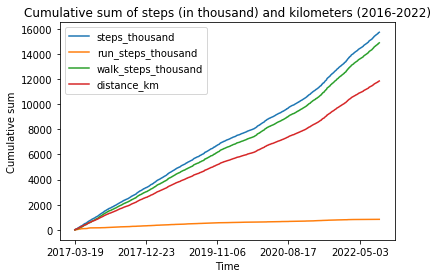

In [18]:
# Graph n°1: Cumulative sum of my steps and distance traveled
g1 = pedometer.set_index("clean_date")[["steps_thousand", "run_steps_thousand", 
                                        "walk_steps_thousand", "distance_km"]].cumsum().plot()

g1.set_title("Cumulative sum of steps (in thousand) and kilometers (2016-2022)")
g1.set(xlabel = "Time", ylabel= 'Cumulative sum')
plt.show()


<div class="alert alert-block alert-warning">
<b>Learnings:</b> 
<br>
    <br><b>Most of my steps are derived from walking, not running</b> (cf steep green and flat orange lines). Furthermore, over 6 years, I was able to walk ca. 16 million steps, i.e. 11,800 km (~7,300 miles). This represents 7,600 steps/day, or put it differently 5 kms/day. 
<br>
    <br><b>I tend to walk more in my daily life in the recent years</b> (cf. steep slope).
</div>

## 4.2. My walking habits changed significantly over time <a class="anchor" id="4.2"></a>

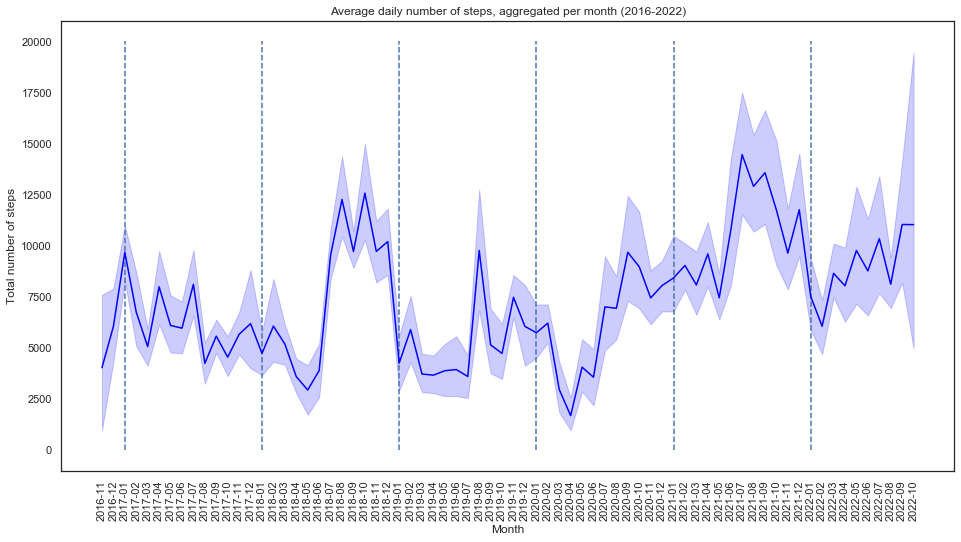

In [19]:
# Graph n°2 : Average daily number of steps, aggregated per month (2016-2022)
sns.set(rc={'figure.figsize':(16,8.27)})
sns.set_style("white")

g2 = sns.lineplot(data = pedometer, x= "month", y = "step_count", color = "blue")
g2.set_title("Average daily number of steps, aggregated per month (2016-2022)")
g2.set(xlabel = "Month", ylabel= "Total number of steps")

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

g2.vlines(x='2017-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2017')
g2.vlines(x='2018-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2018')
g2.vlines(x='2019-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2019')
g2.vlines(x='2020-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2019')
g2.vlines(x='2021-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2020')
g2.vlines(x='2022-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2021')

plt.show()

<div class="alert alert-block alert-warning">
<b>Learnings:</b> 
<br>
<br> <b>The graph above shows my walking habits were not consistent over the last 6 years (i.e. I did not walk exactly 7,600 steps every day).</b> There are indeed some wide disparities depending on the years and months considered. For instance, the years 2017 and 2019 were quite below average, whereas 2018 and 2021 were above average.    
<br>
<br> <b>The ratio between my least and most active periods seems to be about 5.6x.</b> My lowest point was reached in March / April 2020 , when France enforced its first lockdown due to the Covid19 pandemic crisis. This explains why I was walking only 2,500 steps a day. On the contrary, my peak was achieved in June / July 2021, i.e. when the French government allowed again social activities (e.g. hiking in groups, going to the swimming pool, etc). At that time, I was walking about 14,000 steps a day.<br>
<br>
<b>The graph also seems to indicate that I became more and more active over time (cf. positive slope for several consecutive months from March 2020 onwards) </b>. In 2022 however, I walked less than in 2021 but the daily average number of steps is still above that of the other years.<br>
<br> 
<b>Some seasonality seems also to be at play. My busiest periods often take place in summer (July to September)</b>. Examples:    
    <br> i) 2018 2nd semester: This corresponds to the period I was working in Japan. I had to walk a lot in my daily life for going to work and grocery shopping (my apartment was located 20 minutes away from the nearest train station). In summer, I also enjoyed "Obon" holidays by traveling to Hokkaido.
    <br> ii) 2019 August: This refers to my trip in the Netherlands before starting my first full time job. I walked a lot to discover cities Amsterdam or The Hague.
    <br> iii) 2020 August: Covid was (temporarily) over in France and I joined hiking groups to walk in the woods every weekend.<br>
<br>
<b>Finally, the confidence intervals in light blue become more spread over time.</b> This suggests that the daily average number of steps displayed with the dark blue line does not perfectly reflect the reality: there may be days I walk far less or far more than the average number in the recent period.
   
</div>

## 4.3. The mean does not mean anything  <a class="anchor" id="4.3"></a>

[Text(0, 0.5, 'Distance (km)'), Text(0.5, 0, 'Month number')]

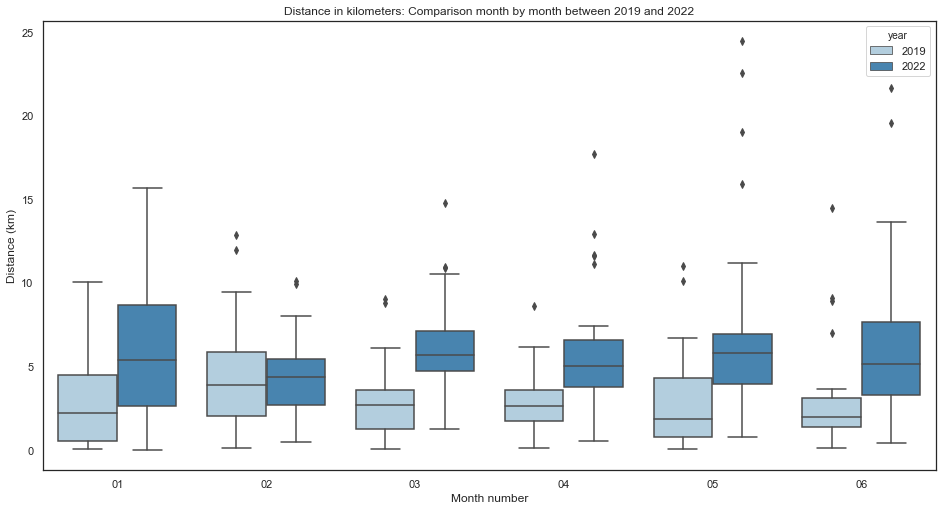

In [20]:
# Graph n°3 : Let's compare the distribution of steps on a small sample of data
    # Monthly comparison, 2019 vs 2022
sample = pedometer[((pedometer["year"]=="2022") & (pedometer["month_number"]<="06"))
                   | ((pedometer["year"]=="2019") & (pedometer["month_number"]<="06"))
                  ].sort_values("clean_date")

g3 = sns.boxplot(data = sample, x= "month_number", y = "distance_km", hue = "year", palette = "Blues")
g3.set_title("Distance in kilometers: Comparison month by month between 2019 and 2022")
g3.set(xlabel = "Month number", ylabel= "Distance (km)")

<div class="alert alert-block alert-warning">
<b>Learnings:</b> The boxplot above shows the distribution of kilometers traveled in a day. It is computed by month, with a comparison between 2019 and 2022 (1st semester only considered in the sample for readibility purposes).
<br>
    <br> <b>It shows that I am systematically more active in 2022 than in 2019</b> (the median in the dark blue box is always above that of the light blue box).
    <br>
    <br> <b> More importantly, it shows that the distance I travel daily varies much more in 2022 than in 2019 </b>. Indeed, the whiskers are much more spead out in 2022. There are also much more outliers that lie very far from the median line. The variation is mostly driven by high values (right skewed distribution). Indeed, the first quartile (Q1) value stays very consistent on the contrary (close to zero) : there are some days I am not active at all, whatever the month or the year considered.
 
</div>

[Text(0, 0.5, 'Distance (km)'), Text(0.5, 0, 'Day of week')]

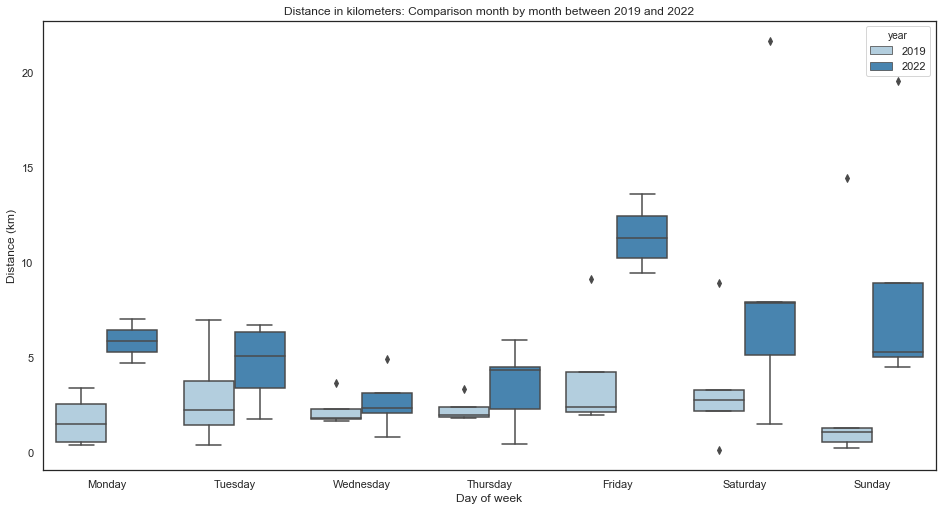

In [21]:
# Graph n°3 : Let's compare the distribution of steps on a small sample of data
    # Day of week comparison YoY
sample = pedometer[((pedometer["year"]=="2022") & (pedometer["month_number"]=="06"))
                   | ((pedometer["year"]=="2019") & (pedometer["month_number"]=="06"))
                  ].sort_values("clean_date")

g4 = sns.boxplot(data = sample, x= "weekday", y = "distance_km", hue = "year", palette = "Blues",
                order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
g4.set_title("Distance in kilometers: Comparison month by month between 2019 and 2022")
g4.set(xlabel = "Day of week", ylabel= "Distance (km)")

<div class="alert alert-block alert-warning">
<b>Learnings:</b> The boxplot above shows the distribution of kilometers traveled in a day. 
    It is computed by day of week, with a comparison between 2019 and 2022 (only June is selected in the sample).
<br>
    <br> <b> It shows that in 2019, my walking habits were quite consistent whatever the day of week considered (around 2.5 km/ day).</b> That is because I was still a student at that time. I was preparing my final exams at my business school and I had no time to go out.
    <br>
    <br> <b>On the contrary, in 2022, my step counts vary a lot depending on the day of week.</b> Wednesday is my least active day, as I am usually working remotely that day. I am quite active on Monday, Tuesday and Thursday because I usually go to the swimming pool after work. Friday is one of my most active days in the week because I am part of a hiking club at work: every Friday, during lunch time, we go for a hike in the forest next to our workplace. Finally Saturday and Sunday are pretty active, with several outliers because I often go for a hike.
    <br>
    <br> <b>
 
</div>

## 4.4. Still, reaching 10 000 steps every day is quite a challenge !<a class="anchor" id="4.4"></a>

In [22]:
# Creating a new variable "goal_10000": It returns 1 if I walked more than 10 000 steps a day
pedometer.loc[pedometer["step_count"]>=10000, "goal_10000"] = 1
pedometer.loc[pedometer["step_count"]<10000, "goal_10000"] = pedometer["step_count"]/10000
pedometer.head(5)

,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,steps_thousand,walk_steps_thousand,run_steps_thousand,year,month,week,month_number,week_number,day_number,weekday,goal_10000
0,2017-03-19,6000,8697,8679,18,6313.56,262.93997,6.31356,8.697,8.679,0.018,2017,2017-03,2017-11,03,11,19,Sunday,0.8697
4,2017-01-30,6000,15350,15286,64,11175.10,472.72995,11.17510,15.350,15.286,0.064,2017,2017-01,2017-05,01,05,30,Monday,1.0000
5,2016-12-17,6000,9854,785,9069,10431.82,712.87000,10.43182,9.854,0.785,9.069,2016,2016-12,2016-50,12,50,17,Saturday,0.9854
6,2017-02-15,6000,5388,5388,0,3905.87,165.17000,3.90587,5.388,5.388,0.000,2017,2017-02,2017-07,02,07,15,Wednesday,0.5388
7,2016-11-27,6000,7088,1005,6083,7395.91,492.03000,7.39591,7.088,1.005,6.083,2016,2016-11,2016-47,11,47,27,Sunday,0.7088


[Text(120.5, 0.5, 'Week number'), Text(0.5, 50.88312499999999, 'Day of week')]

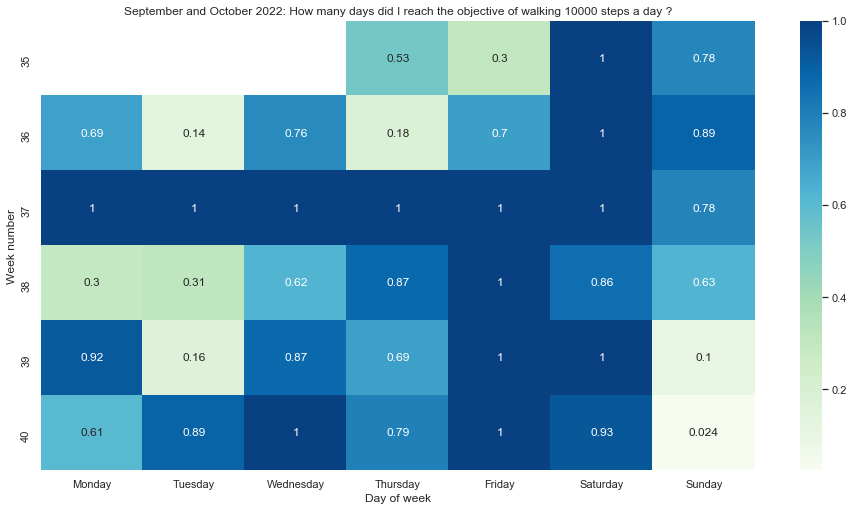

In [23]:
## Graph n°5: Heatmap 

# Preparing the data for the heatmap
sample2 = pedometer[(pedometer["year"]=="2022") 
                    & ((pedometer["month_number"]=="09")
                      | (pedometer["month_number"]=="10"))][["week_number", "weekday","goal_10000"]]

sample2 = sample2.pivot(index= "week_number", columns = "weekday", values = "goal_10000")
cols_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sample2 = sample2[cols_order]

# Heatmap
g5 = sns.heatmap(sample2, annot=True, cmap="GnBu")
g5.set_title("September and October 2022: How many days did I reach the objective of walking 10000 steps a day ?")
g5.set(xlabel = "Day of week", ylabel= "Week number")


<div class="alert alert-block alert-warning">
<b>Learnings:</b> 
    <br>
    <br>
     <b>In September and early October 2022, I could pass the "10000 steps a day" challenge only 12 days out of 39 days in total (i.e. ca 30% of the time).</b> The days I was successful were mostly Fridays (hiking club at my company during lunch time) and Saturdays (Meetup hikes, going out etc). Finally, during week 37, I was able to reach the objective everyday except Sunday. Indeed, I was hiking in Spain the whole week.
</div>

## 4.5. What about calories ? Distance to walk to burn the equivalent of a croissant <a class="anchor" id="4.5"></a>

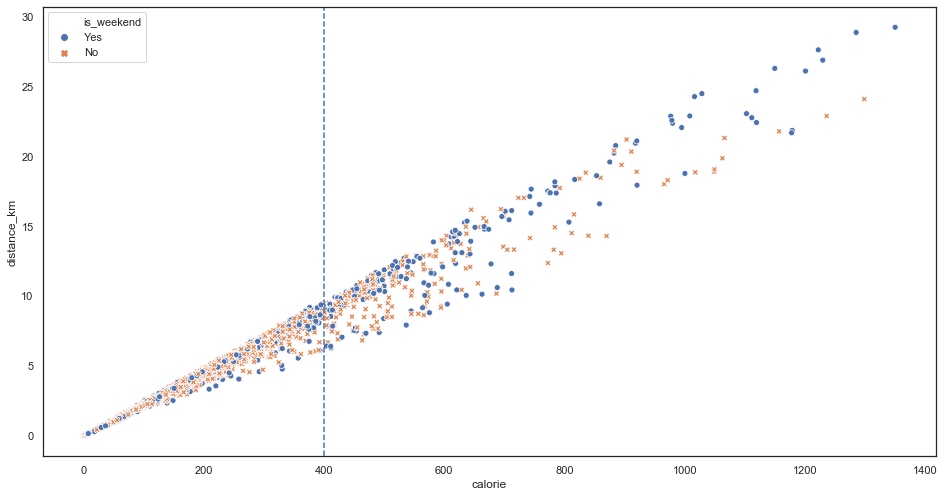

In [24]:
# Creating a "weekend" variable 
pedometer.loc[((pedometer["weekday"] == "Sunday") | (pedometer["weekday"] == "Saturday")), "is_weekend"] = "Yes"
pedometer.loc[((pedometer["weekday"] != "Sunday") & (pedometer["weekday"] != "Saturday")), "is_weekend"] = "No"

# Scatterplot with a cut line at 400 calories
g6 = sns.scatterplot(data = pedometer, x= "calorie", y="distance_km", hue = "is_weekend", style = "is_weekend")
g6.axvline(x=400, color='b', linestyle='dashed')

<div class="alert alert-block alert-warning">
<b>Learnings:</b> 
    <br>
    <br> <b>The scatterplot above shows that I should walk about 10 kms in a day to eliminate the croissant (the latter is worth about 400 calories).</b> That is quite a long distance ! Fortunately, I tend to walk quite a lot during weekends (blue dots) so having a brunch once in a while should not be a problem...!
     <b>
</div>

# 5. Conclusion  <a class="anchor" id="5"></a>

## 5.1. Summary of the insights and how to go further  <a class="anchor" id="5.1"></a>

The case study demonstrated that :
* **I am a walker, not a runner**
* **My performances are mainly driven by my school and work schedules.** Indeed, I tend to walk more during the weekends and when I am on holiday. On the contrary, my step count is low when I am working remotely or when there was the Covid19 pandemic in France.
* **I do not often reach 10,000 steps a day as recommended by the World Health Organization.** I try to compensate with long hikes during the weekends or with my coworker group at lunch time.
* **It takes about 10 km to burn 400 calories.** Better be careful when eating some French pastries !

The case study could have been improved in various ways. 
* Developing further the data visualization part with a summary dashboard
* Making some time series predictions (what do I expect my step count to be next month ?)
* Joining Samsung health data with other data (e.g. weight data)

## 5.2. Challenges encountered <a class="anchor" id="5.2"></a>

I faced many technical challenges while preparing this case study. Here are some examples:

* **Dataset understanding: I could not find any exhaustive documentation online about my dataset.** Therefore I had to get rid of some variables because I was not sure about their interpretation (e.g. what is a "healthy step" ?) 
* **Quality of data: It was very hard to understand why my original dataset had so many duplicates (Was it a bug of the Samsung Health app ? A timezone problem ? ...) and how to get rid of them properly.** Data cleaning was thus quite tedious.
* **Data source: The data I got from Samsung underestimate my level of activity** because they come from my smartphone, not a smartwatch. Thus I have no record of my dance class lessons and swimming sessions. This may have been a problem if I tried to an exhaustive view of my physical activity level.
* **Data source: My data will not be up to date** because I used a flat file. Furthermore, I could not make any use of the many Json files that accompanied the csv files. Perhaps it would have added some extra insights.

## 5.3. What I learnt as a data analyst <a class="anchor" id="5.3"></a>

I loved writing this case study and I learnt a lot because:
* **This was the first time I was coding in Python.** 
In my professional life, I am used to code in SQL and R, so this was refreshing to learn how to code in another language.
* **This was also the first time I was using the Jupyter Notebook and Markdown formats.** I found it very convenient to display at the same time code, comments and final outputs to make the case study easier to understand.
* **Data cleaning is as always very crucial**. Without getting rid off duplicates, I would have overestimated my total step count by at least 20% !

## Thank you for reading this far and happy hiking !

  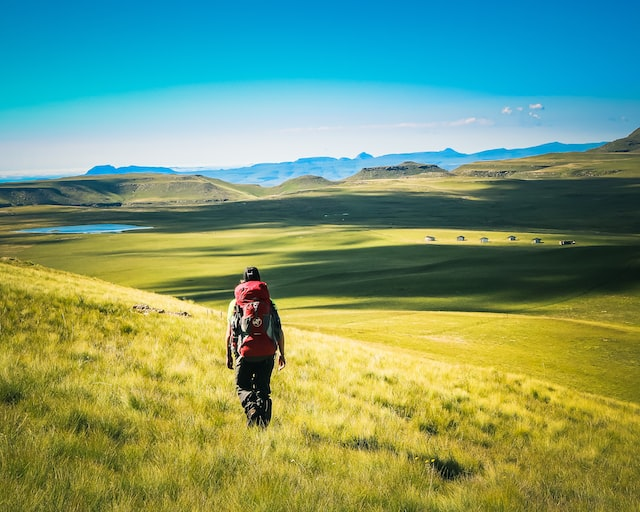
  
  Photo by <a href="https://unsplash.com/@arthurhick?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Arthur Hickinbotham</a> on <a href="https://unsplash.com/s/photos/hiking?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  